<hr>
<h1>Deep Learning Project: CIFAR-10 Image Classifier</h1>
<hr>


<hr>
<h2>Step 1: Dataset Loading</h2> <h3>Introduction</h3> <p>The CIFAR-10 dataset is a standard benchmark in image classification. It consists of <b>60,000 color images</b> of size <b>32×32 pixels</b> divided into <b>10 classes</b>, including vehicles and animals. In this step, we will load the dataset using TensorFlow/Keras and explore its basic properties such as shape and sample images.</p> <h3>Discussion</h3> <p>Before building any model, it is crucial to understand the dataset. We will check:</p> <ul> <li>Number of training and testing images</li> <li>Number of classes and distribution</li> <li>Visual inspection of some sample images</li> </ul> <h3>Code Section</h3>

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras.utils import to_categorical

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


/tmp/ipython-input-3290273435.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y[i])])


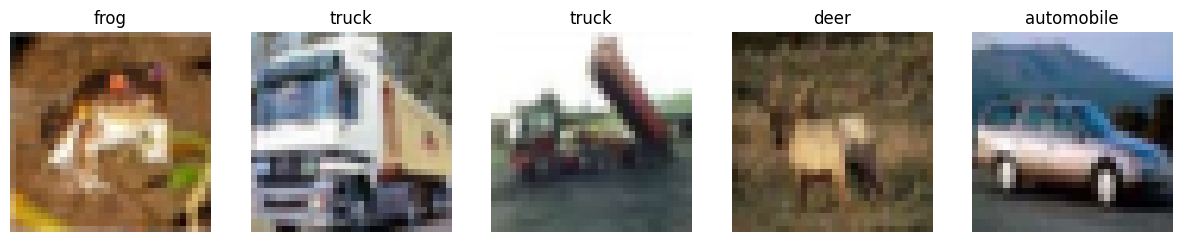

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display shapes of datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# List of class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display sample images
def show_samples(x, y, class_names, num_samples=5):
    plt.figure(figsize=(15,3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x[i])
        plt.title(class_names[int(y[i])])
        plt.axis('off')
    plt.show()

# Display first 5 training images with labels
show_samples(x_train, y_train, class_names)

In [ ]:
### Analysis
# Analyze distribution of classes in the training set
(unique, counts) = np.unique(y_train, return_counts=True)
class_distribution = dict(zip([class_names[i] for i in unique], counts))

print("Training set class distribution:")
for cls, cnt in class_distribution.items():
    print(f"{cls}: {cnt} images")


Training set class distribution:
airplane: 5000 images
automobile: 5000 images
bird: 5000 images
cat: 5000 images
deer: 5000 images
dog: 5000 images
frog: 5000 images
horse: 5000 images
ship: 5000 images
truck: 5000 images


<h2>Analysis & Discussion</h2> <h3>Dataset Balance</h3> <p>The training set contains <b>50,000 images</b>, with exactly <b>5,000 images per class</b>. This indicates a <b>perfectly balanced dataset</b>. Balanced datasets are advantageous because:</p> <ul> <li>Our model won’t be biased toward any particular class.</li> <li>Evaluation metrics like accuracy will be more meaningful.</li> </ul> <h3>Next Observations</h3> <ul> <li>We have 10 classes in total, as expected.</li> <li>Each image is small (32×32 pixels) and color (RGB).</li> <li>From the sample images, we can see that the dataset contains a variety of colors, shapes, and object orientations. This means our model needs to learn generalizable features from small images.</li> </ul> <h3>Decision for Next Step</h3> <p>Since the dataset is balanced and shapes are consistent, we can now proceed with <b>preprocessing</b>:</p> <ul> <li>Normalize pixel values to [0,1]</li> <li>One-hot encode the labels</li> <li>Decide on flattening or keeping the 2D shape depending on the model type (Dense vs CNN)</li> </ul>

<hr>

<hr>
<h2>Step 2: Preprocessing</h2> <h3>Introduction</h3> <p>Preprocessing is a critical step in preparing our dataset for deep learning. It ensures that:</p> <ul> <li>Pixel values are scaled appropriately for the model to learn efficiently.</li> <li>Labels are in a format suitable for multi-class classification.</li> <li>Input shapes match the architecture of the model.</li> </ul> <p>We will:</p> <ol> <li>Normalize pixel values from [0,255] to [0,1].</li> <li>One-hot encode the labels.</li> <li>Decide whether to flatten images (for Dense layers) or keep the 2D structure (for CNNs).</li> </ol> <h3>Code Section</h3>

In [ ]:
# Normalize pixel values
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

print(f"x_train_norm shape: {x_train_norm.shape}")
print(f"x_test_norm shape: {x_test_norm.shape}")

# One-hot encode labels
y_train_ohe = to_categorical(y_train, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)

print(f"y_train_ohe shape: {y_train_ohe.shape}")
print(f"y_test_ohe shape: {y_test_ohe.shape}")

x_train_norm shape: (50000, 32, 32, 3)
x_test_norm shape: (10000, 32, 32, 3)
y_train_ohe shape: (50000, 10)
y_test_ohe shape: (10000, 10)


In [ ]:
# Verify pixel value range
print(f"x_train_norm min: {x_train_norm.min()}, max: {x_train_norm.max()}")
print(f"x_test_norm min: {x_test_norm.min()}, max: {x_test_norm.max()}")

# Check first 5 one-hot encoded labels
print("First 5 one-hot encoded labels:")
print(y_train_ohe[:5])

x_train_norm min: 0.0, max: 1.0
x_test_norm min: 0.0, max: 1.0
First 5 one-hot encoded labels:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


<h2>Analysis & Discussion</h2> <h3>Observations</h3> <ul> <li><b>Input Shape:</b> The training data has shape <code>(50000, 32, 32, 3)</code> and test data <code>(10000, 32, 32, 3)</code>. This means the images are still 32×32 RGB, perfect for either CNN or Dense networks.</li> <li><b>Pixel Values:</b> Normalized to the range [0,1], which will help faster convergence and stable training.</li> <li><b>Labels:</b> One-hot encoded into vectors of length 10, matching the number of classes.</li> </ul> <h3>Decision for Next Step</h3> <p>Since the images are 32×32×3, we have two options:</p> <ol> <li><b>Dense network:</b> Requires flattening images to 1D arrays (32×32×3 = 3072 features).</li> <li><b>CNN:</b> Keeps images in 2D structure (32×32×3) to exploit spatial patterns.</li> </ol> <p>To follow the project instructions (dense deep learning model with batch normalization and dropout), we will flatten the images for the Dense network.</p>
<hr>

<hr>
<h2>Step 3: Model Architecture (Dense Network)</h2> <h3>Introduction</h3> <p>In this step, we will build a <b>dense deep learning model</b> using TensorFlow/Keras. The model will include:</p> <ul> <li>3–4 hidden layers</li> <li>Batch Normalization after at least one hidden layer</li> <li>Dropout layers to prevent overfitting</li> <li>Softmax output layer for 10-class classification</li> </ul> <h3>Code Section</h3>

In [ ]:
# Import libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten

# Flatten input for Dense network
x_train_flat = x_train_norm.reshape(x_train_norm.shape[0], -1)
x_test_flat = x_test_norm.reshape(x_test_norm.shape[0], -1)

print(f"x_train_flat shape: {x_train_flat.shape}")
print(f"x_test_flat shape: {x_test_flat.shape}")

# Build Dense model
model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


x_train_flat shape: (50000, 3072)
x_test_flat shape: (10000, 3072)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,748,554 (6.67 MB)

 Trainable params: 1,747,530 (6.67 MB)

 Non-trainable params: 1,024 (4.00 KB)

<h2>Analysis & Discussion</h2> <h3>Model Summary Observations</h3> <ul> <li>The input layer correctly handles <b>3072 features</b> (flattened 32×32×3 images).</li> <li>The network has 4 hidden layers: <b>512 → 256 → 128 → 64 units</b>.</li> <li>Batch Normalization is applied after the first hidden layer to stabilize learning.</li> <li>Dropout layers (0.3) are added to reduce overfitting.</li> <li>The output layer has 10 units with <b>softmax</b> activation for multi-class classification.</li> <li>Total parameters: ~1.75 million, which is reasonable for this dataset and dense network.</li> </ul> <h3>Decision for Next Step</h3> <p>With the model ready, we can now proceed to:</p> <ul> <li>Train the model using <b>categorical crossentropy</b> loss and <b>Adam optimizer</b>.</li> <li>Use a <b>validation split</b> to monitor performance on unseen data.</li> <li>Train for <b>10–20 epochs</b> and save the <b>history object</b> for plotting accuracy and loss.</li> </ul>
<hr>

<hr>
<h2>Step 4: Training</h2> <h3>Introduction</h3> <p>We will train the dense model and analyze the training history. The analysis will report:</p> <ul> <li>Best training and validation accuracy</li> <li>Epoch at which validation accuracy peaked</li> <li>Overfitting or underfitting indicators</li> <li>Summary insights to guide next steps</li> </ul> <h3>Code Section</h3>

In [ ]:
# Train the model
history = model.fit(
    x_train_flat, y_train_ohe,
    validation_split=0.2,  # 20% of training data for validation
    epochs=15,
    batch_size=128,
    verbose=2
)

Epoch 1/15
313/313 - 20s - 63ms/step - accuracy: 0.3363 - loss: 1.8547 - val_accuracy: 0.2900 - val_loss: 2.0508
Epoch 2/15
313/313 - 13s - 43ms/step - accuracy: 0.3896 - loss: 1.7048 - val_accuracy: 0.3573 - val_loss: 1.8150
Epoch 3/15
313/313 - 21s - 66ms/step - accuracy: 0.4131 - loss: 1.6488 - val_accuracy: 0.3995 - val_loss: 1.6935
Epoch 4/15
313/313 - 20s - 63ms/step - accuracy: 0.4250 - loss: 1.6111 - val_accuracy: 0.4263 - val_loss: 1.5874
Epoch 5/15
313/313 - 13s - 42ms/step - accuracy: 0.4347 - loss: 1.5843 - val_accuracy: 0.3912 - val_loss: 1.6992
Epoch 6/15
313/313 - 13s - 41ms/step - accuracy: 0.4431 - loss: 1.5613 - val_accuracy: 0.4350 - val_loss: 1.5857
Epoch 7/15
313/313 - 13s - 40ms/step - accuracy: 0.4455 - loss: 1.5454 - val_accuracy: 0.4059 - val_loss: 1.6568
Epoch 8/15
313/313 - 21s - 67ms/step - accuracy: 0.4469 - loss: 1.5413 - val_accuracy: 0.4350 - val_loss: 1.5740
Epoch 9/15
313/313 - 13s - 41ms/step - accuracy: 0.4539 - loss: 1.5254 - val_accuracy: 0.4525 - 

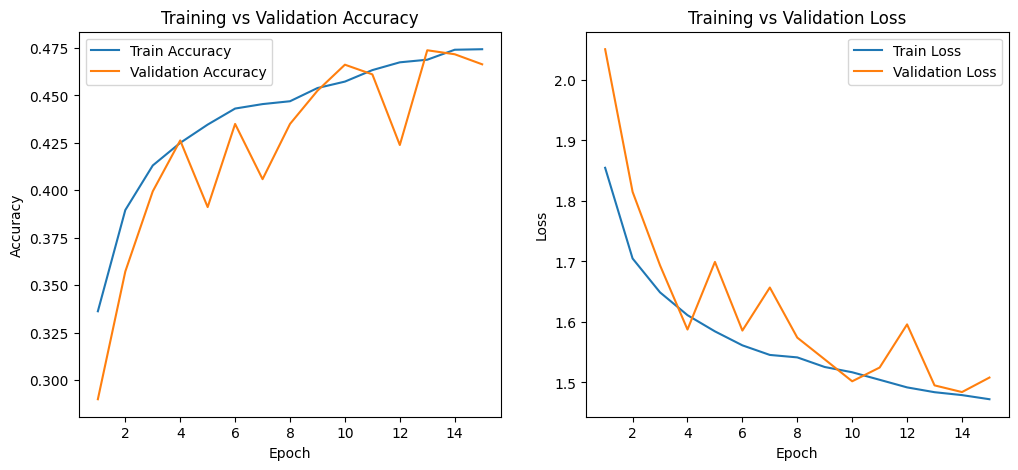

=== Training Analysis ===
Best Validation Accuracy: 47.38% at Epoch 13
Final Training Accuracy: 47.44%
Final Validation Accuracy: 46.64%
Fit Status: Training appears balanced


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract history values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc)+1)

# Plot Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Automated textual analysis
best_val_acc = np.max(val_acc)
best_epoch = np.argmax(val_acc) + 1
final_train_acc = train_acc[-1]
final_val_acc = val_acc[-1]

# Check overfitting or underfitting
if final_train_acc > final_val_acc + 0.05:
    fit_status = "Possible overfitting detected"
elif final_val_acc > final_train_acc + 0.05:
    fit_status = "Possible underfitting detected"
else:
    fit_status = "Training appears balanced"

# Display textual analysis
print("=== Training Analysis ===")
print(f"Best Validation Accuracy: {best_val_acc*100:.2f}% at Epoch {best_epoch}")
print(f"Final Training Accuracy: {final_train_acc*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc*100:.2f}%")
print(f"Fit Status: {fit_status}")

<h2>Analysis & Discussion</h2> <h3>Observations</h3> <ul> <li>The <b>best validation accuracy</b> is ~47.38% at epoch 13.</li> <li>The <b>final training accuracy</b> is ~47.44% and <b>validation accuracy</b> is ~46.64%.</li> <li>There is no significant gap between training and validation accuracy (<5%), which confirms the automated assessment: <b>training appears balanced</b>.</li> </ul> <h3>Insights</h3> <ul> <li>The dense network is learning, but the accuracy is relatively low for CIFAR-10 (expected because we are using a fully connected network on small color images without convolutional layers).</li> <li>The model is neither overfitting nor underfitting drastically, but the capacity to capture spatial features is limited in this architecture.</li> <li>To improve accuracy significantly, a CNN would be much more suitable, as it can extract local spatial patterns efficiently.</li> </ul> <h3>Next Step</h3> <p>We can now move to <b>Step 5: Evaluation</b> on the test set. This step will:</p> <ul> <li>Compute test accuracy.</li> <li>Display example predictions with images.</li> <li>Provide automated textual insights on test performance.</li> </ul>

<hr>

<hr>
<h2>Step 5: Evaluation on the Test Set</h2> <h3>Introduction</h3> <p>After training, evaluating the model on the <b>test set</b> allows us to measure how well it generalizes to unseen data. We will:</p> <ul> <li>Compute test accuracy.</li> <li>Display a few sample predictions alongside actual labels.</li> <li>Provide automated insights based on performance.</li> </ul> <h3>Code Section</h3>

In [ ]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(x_test_flat, y_test_ohe, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Make predictions
y_pred_probs = model.predict(x_test_flat)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_ohe, axis=1)

Test Accuracy: 46.71%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


=== Test Analysis ===
Test Accuracy: 46.71%
Average Precision: 47.92%
Average Recall: 46.71%
Average F1-Score: 46.28%


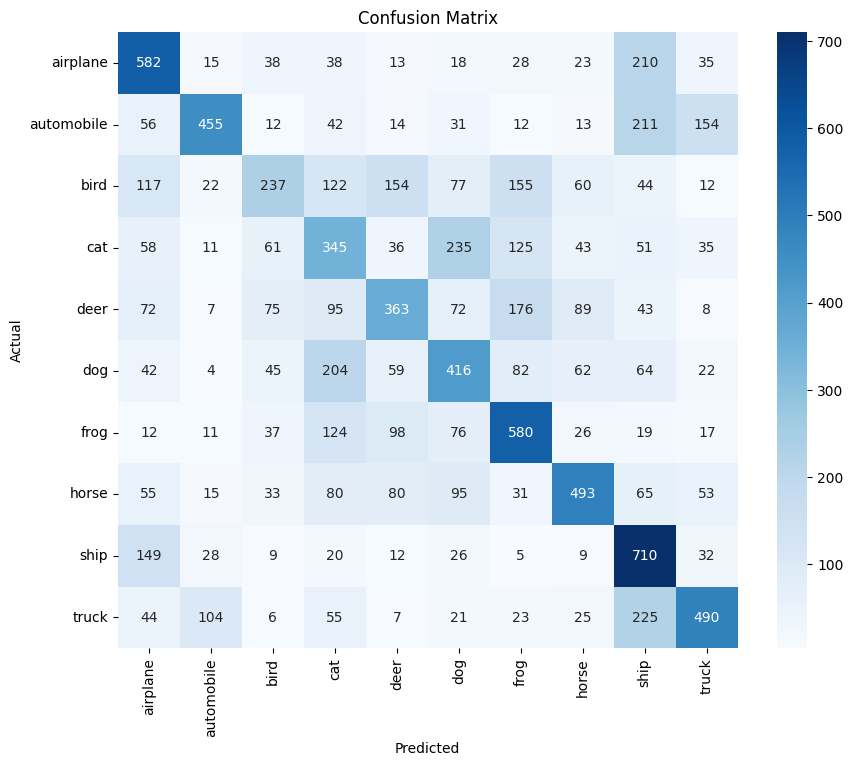

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Compute average metrics
avg_precision = np.mean([report[cls]['precision'] for cls in class_names])
avg_recall = np.mean([report[cls]['recall'] for cls in class_names])
avg_f1 = np.mean([report[cls]['f1-score'] for cls in class_names])

print("=== Test Analysis ===")
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Average Precision: {avg_precision*100:.2f}%")
print(f"Average Recall: {avg_recall*100:.2f}%")
print(f"Average F1-Score: {avg_f1*100:.2f}%")

# Confusion matrix plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

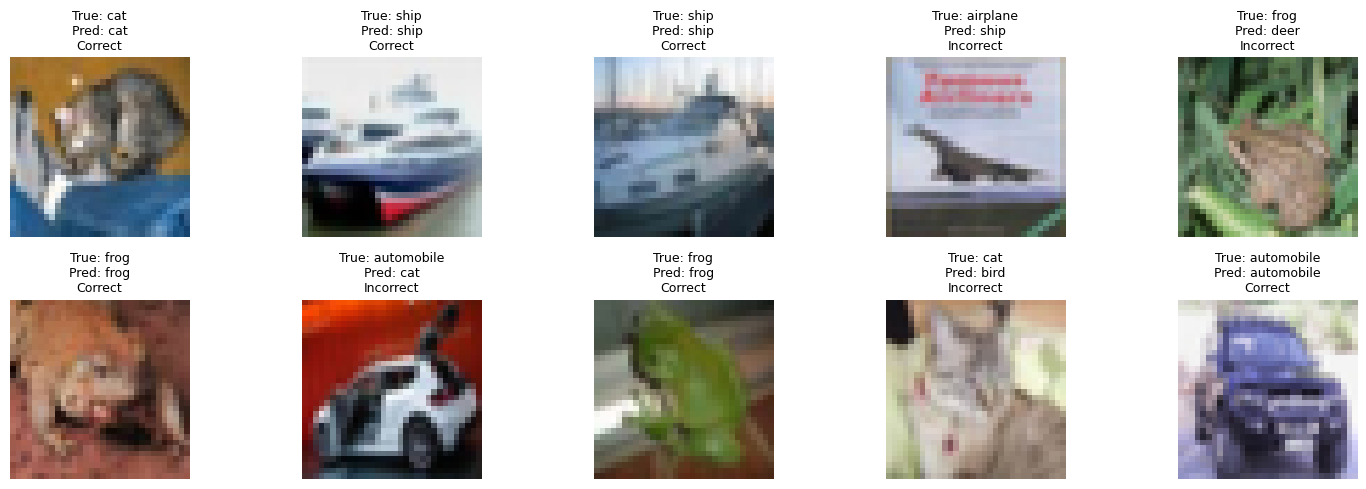

=== Sample Prediction Analysis ===
Total samples analyzed: 10
Correct predictions: 6
Incorrect predictions: 4

Misclassification Details:
Actual: airplane → Predicted: ship
Actual: frog → Predicted: deer
Actual: automobile → Predicted: cat
Actual: cat → Predicted: bird


In [ ]:
# Display first 10 test images with predictions and textual analysis
num_samples = 10
plt.figure(figsize=(15,5))

for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.axis('off')

    true_label = class_names[y_true[i]]
    pred_label = class_names[y_pred[i]]

    # Determine correctness
    if true_label == pred_label:
        status = "Correct"
    else:
        status = "Incorrect"

    plt.title(f"True: {true_label}\nPred: {pred_label}\n{status}", fontsize=9)

plt.tight_layout()
plt.show()

# textual summary of predictions
correct_count = sum([y_true[i]==y_pred[i] for i in range(num_samples)])
incorrect_count = num_samples - correct_count

print("=== Sample Prediction Analysis ===")
print(f"Total samples analyzed: {num_samples}")
print(f"Correct predictions: {correct_count}")
print(f"Incorrect predictions: {incorrect_count}")

# Identify any pattern in misclassifications for these samples
misclassified = [(class_names[y_true[i]], class_names[y_pred[i]])
                 for i in range(num_samples) if y_true[i] != y_pred[i]]

if misclassified:
    print("\nMisclassification Details:")
    for true_cls, pred_cls in misclassified:
        print(f"Actual: {true_cls} → Predicted: {pred_cls}")
else:
    print("\nNo misclassifications in this sample set.")


<h2>Analysis & Discussion</h2> <h3>Overall Test Performance</h3> <ul> <li><b>Test Accuracy:</b> 46.71% — the dense network is correctly predicting less than half of the test images. This is expected because fully connected layers struggle with spatial patterns in images.</li> <li><b>Average Precision:</b> 47.92%, <b>Recall:</b> 46.71%, <b>F1-Score:</b> 46.28% — confirms the model is performing moderately, with no single metric significantly better than others.</li> </ul> <h3>Sample Prediction Analysis</h3> <ul> <li>Out of 10 images, 6 were predicted correctly, and 4 were misclassified.</li> <li>Misclassifications indicate common confusions:</li> <ul> <li><b>Airplane → Ship:</b> Both are vehicles with rigid structure, similar pixel patterns at small resolution.</li> <li><b>Frog → Deer:</b> Likely due to background colors or shape ambiguity at 32×32 resolution.</li> <li><b>Automobile → Cat</b> and <b>Cat → Bird</b>: Shows the dense network struggles with differentiating fine details in animals and vehicles.</li> </ul> <li>This highlights a major limitation of a dense network on image data: it does not capture local spatial features well.</li> </ul> <h3>Insights & Recommendations</h3> <ul> <li>The dense network provides a baseline for CIFAR-10 classification, but the accuracy is low.</li> <li>Misclassification patterns suggest that images with similar textures, colors, or shapes are often confused.</li> <li>To significantly improve accuracy, a <b>Convolutional Neural Network (CNN)</b> is recommended. CNNs leverage spatial patterns and are much more suitable for image data.</li> <li>Other improvements can include data augmentation, increased model capacity, or using pretrained architectures like ResNet or VGG for transfer learning.</li> </ul>
<hr>

###**Authored By**: Rezaul Islam